(test-functions:sulfur)=
# Sulfur Model

The sulfur model is a nine-dimensional scalar-valued function.
Based on the model from {cite}`Charlson1992`,
the model was used in {cite}`Tatang1997` in the context of metamodeling
and uncertainty propagation.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import uqtestfuns as uqtf

## Test function instance

To create a default instance of the sulfur model test function, type:

In [2]:
my_testfun = uqtf.Sulfur()

Check if the function has been correctly instantiated:

In [3]:
print(my_testfun)

Name              : Sulfur
Spatial dimension : 9
Description       : Sulfur model from Charlson et al. (1992)


## Description

The sulfur model analytically computes the direct radiative forcing
by sulfate aerosols using the following expression:

$$
\mathcal{M}(\boldsymbol{x}) = - \frac{1}{2} \, S_0 \, (1 - A_c) \, T^2 \, (1-R_s)^2 \, \bar{\beta} \, \Psi_e \, f_{\Psi_{e}} \frac{3 \, Q \times 10^{12} \, Y L}{365 A}
$$
where $\boldsymbol{x} = \{ Q, Y, L, \Psi_e, \bar{\beta}, f_{\Psi_{e}}, T^2, (1 - A_c), (1 - R_s)^2 \}$
is the nine-dimensional vector of input variables further defined below.

To evaluate this expression, the values for two additional parameters are taken
from the literature:

- $S_0 = 1361 \, [\mathrm{W/m^2}]$ (_the solar constant_) {cite}`Kopp2011`
- $A = 5.1 \times 10^{14} \, [\mathrm{days}]$ (_surface area of the earth_) {cite}`Pidwirny2006`

```{important}
The equation for the sulfur model in {cite}`Tatang1997` (Eq. (12)) is erroneous.

- The solar constant $S_0$ should not be squared otherwise the dimension
  will not agree.
- The equation is missing factors 365 in the denominator and $10^{12}$
   in the numerator because the parameter $L$
   (_sulfate lifetime in the atmosphere_) is given in $[\mathrm{days}]$
   while the parameter $Q$ (_global input flux of the anthropogenic sulfur_)
   is given in $[\mathrm{T gS/year}]$).
```

## Probabilistic input

The probabilistic input model for the sulfur model consists of nine independent
uniform random variables with marginals shown in the table below.
This specification is taken from {cite}`Penner1994` (Table 2); in the original
specification, all parameters of the log-normal marginals are given in terms
of geometric mean and geometric standard deviation.

In [4]:
my_testfun.prob_input

ProbInput(spatial_dimension=9, marginals=(UnivDist(distribution='lognormal', parameters=array([4.26267988, 0.13976194]), name='Q', description='Source strength of anthropogenic Sulfur [10^12 g/year]'), UnivDist(distribution='lognormal', parameters=array([-0.69314718,  0.40546511]), name='Y', description='Fraction of SO2 oxidized to SO4(2-) aerosol [-]'), UnivDist(distribution='lognormal', parameters=array([1.70474809, 0.40546511]), name='L', description='Average lifetime of atmospheric SO4(2-) [days]'), UnivDist(distribution='lognormal', parameters=array([1.60943791, 0.33647224]), name='Psi_e', description='Aerosol mass scattering efficiency [m^2/g]'), UnivDist(distribution='lognormal', parameters=array([-1.2039728 ,  0.26236426]), name='beta', description='Fraction of light scattered upward hemisphere [-]'), UnivDist(distribution='lognormal', parameters=array([0.53062825, 0.18232156]), name='f_Psi_e', description='Fractional increase in aerosol scattering efficiency due to hygroscopic growth [-]'), UnivDist(distribution='lognormal', parameters=array([-0.54472718,  0.33647224]), name='T^2', description='Square of atmospheric transmittance above aerosol layer [-]'), UnivDist(distribution='lognormal', parameters=array([-0.94160854,  0.09531018]), name='(1-Ac)', description='Fraction of earth not covered by cloud [-]'), UnivDist(distribution='lognormal', parameters=array([-0.32850407,  0.18232156]), name='(1-Rs)^2', description='Square of surface coalbedo [-]')), copulas=None, name='Sulfur-Penner1994', description='Probabilistic input model for the Sulfur model from Penner et al. (1994).')

```{note}
- The geometric mean and the geometric standard deviation of a lognormal
  distribution are the exponentiated mu and sigma parameters 
  (that is, the mean and the standard deviation of the underlying
  normal distribution), respectively.
- While the probabilistic input specification in {cite}`Tatang1997` is similar
  to the one in {cite}`Penner1994`, the parameters $T$ and $(1 - R_s)$ in
  {cite}`Penner1994` were given in the squared form
  (that is, $T^2$ and $1 - R_s)^2$).
  This makes the formula simpler as it takes multiplicative form.
```

## Reference results

This section provides several reference results of typical UQ analyses involving
the test function.

### Sample histogram

Shown below is the histogram of the output based on $100'000$ random points:

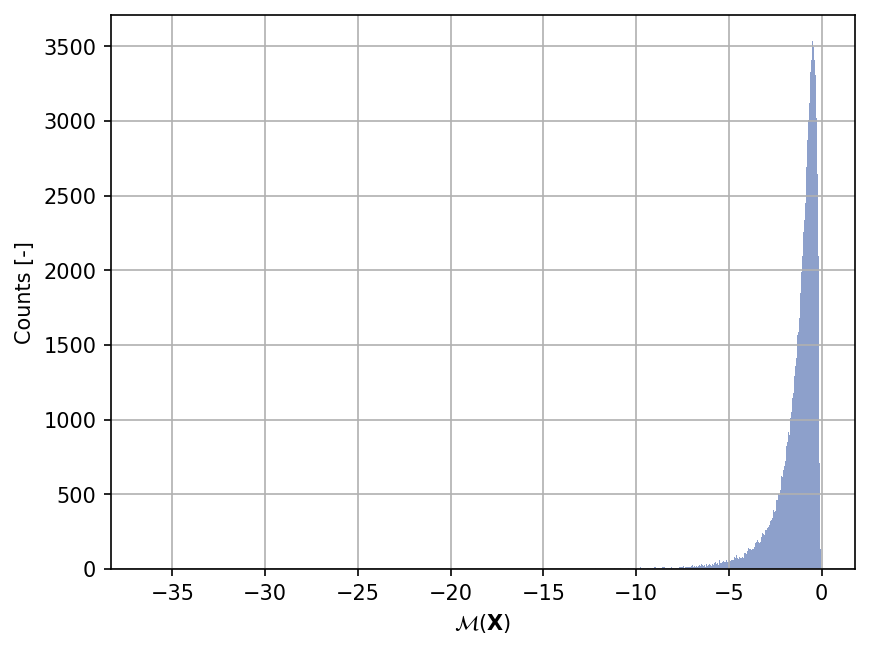

In [5]:
np.random.seed(42)
xx_test = my_testfun.prob_input.get_sample(100000)
yy_test = my_testfun(xx_test)

plt.hist(yy_test, bins="auto", color="#8da0cb");
plt.grid();
plt.ylabel("Counts [-]");
plt.xlabel("$\mathcal{M}(\mathbf{X})$");
plt.gcf().set_dpi(150);

### Moments estimation

Due to the multiplicative form of the function, the geometric mean (the mode)
and the geometric standard deviation of the response are analytically available
given the input specification (from {cite}`Penner1994`,
all input variables are log-normally distributed).
The geometric mean is given as follows:

$$
\mu_g = \exp \left( \sum_{m = 1}^9 \ln \mu_{g, X_i} + \ln 0.5 + \ln S_0 + \ln 3  + \ln 10^{12} - \ln 365 - \ln A \right)
$$
where $\mu_{g, X_i}$'s are the geometric mean of the input variables.
Notice that all the (log) constants that appear in the equation must be added.

The geometric standard deviation is given as follows:

$$
\sigma_g = \exp \left( \sqrt{\sum_{m = 1}^9 \ln^2 \sigma_{g, X_i}} \right),
$$
where $\sigma_{g, X_i}$'s are the geometric standard deviation of the input variables.
The geometric variance of the output is then:

$$
\sigma^2_g = \exp \left( \sum_{m = 1}^9 \ln^2 \sigma_{g, X_i} \right).
$$

Shown below is the convergence of a direct Monte-Carlo estimation of
the output mean and variance with increasing sample sizes compared with the
analytical values. The error bars corresponds to twice the standard deviation
of the estimates obtained from $25$ replications.

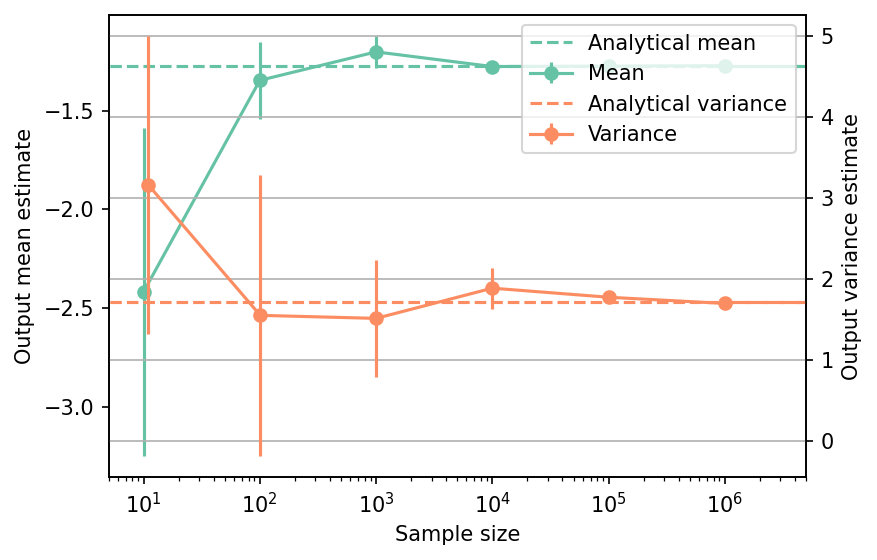

In [6]:
# --- Compute the analytical mu and sigma parameters
mu = 0.0
var = 0.0
marginals = my_testfun.prob_input.marginals
for i in range(9):
    mu += marginals[i].parameters[0]
    var += marginals[i].parameters[1] ** 2

# Plus some additional factors in the Sulfur model formula (only for mu)
solar_constant = uqtf.test_functions.sulfur.SOLAR_CONSTANT
earth_area = uqtf.test_functions.sulfur.EARTH_AREA
days_in_year = uqtf.test_functions.sulfur.DAYS_IN_YEAR
mu += (
    np.log(1e12)
    + np.log(0.5)
    + np.log(3)
    + np.log(solar_constant)
    - np.log(earth_area)
    - np.log(days_in_year)
)

# Get the standard deviation
sigma = np.sqrt(var)

# --- Compute the analytical mean and variance
mean_analytical = -1 * np.exp(mu + sigma**2 / 2)
var_analytical = (np.exp(sigma**2) - 1) * np.exp(2 * mu + sigma**2)

# --- Compute the analytical geometric mean and variance
geom_mean_analytical = np.exp(mu)
geom_var_analytical = np.exp(sigma**2)

# --- Compute the MC estimate of the mean and variance
np.random.seed(42)
sample_sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6], dtype=int)
mean_estimates = np.empty((len(sample_sizes), 25))
var_estimates = np.empty((len(sample_sizes), 25))

for i, sample_size in enumerate(sample_sizes):
    for j in range(25):
        xx_test = my_testfun.prob_input.get_sample(sample_size)
        yy_test = my_testfun(xx_test)
        mean_estimates[i, j] = np.mean(yy_test)
        var_estimates[i, j] = np.var(yy_test)

mean_estimates_errors = np.std(mean_estimates, axis=1)
var_estimates_errors = np.std(var_estimates, axis=1)

# --- Plot the mean and variance estimates
fig, ax_1 = plt.subplots(figsize=(6,4))

ext_sample_sizes = np.insert(sample_sizes, 0, 1)
ext_sample_sizes = np.insert(ext_sample_sizes, -1, 5e6)

# --- Mean plot
ax_1.errorbar(
    sample_sizes,
    mean_estimates[:,0],
    yerr=2.0*mean_estimates_errors,
    marker="o",
    color="#66c2a5",
    label="Mean"
)
# Plot the analytical mean
ax_1.plot(
    ext_sample_sizes,
    np.repeat(mean_analytical, len(ext_sample_sizes)),
    linestyle="--",
    color="#66c2a5",
    label="Analytical mean",
)
ax_1.set_xlim([5, 5e6])
ax_1.set_xlabel("Sample size")
ax_1.set_ylabel("Output mean estimate")
ax_1.set_xscale("log");
ax_2 = ax_1.twinx()

# --- Variance plot
ax_2.errorbar(
    sample_sizes+1,
    var_estimates[:,0],
    yerr=2.0*var_estimates_errors,
    marker="o",
    color="#fc8d62",
    label="Variance",
)
# Plot the analytical variance
ax_2.plot(
    ext_sample_sizes,
    np.repeat(var_analytical, len(ext_sample_sizes)),
    linestyle="--",
    color="#fc8d62",
    label="Analytical variance",
)
ax_2.set_ylabel("Output variance estimate")

# Add the two plots together to have a common legend
ln_1, labels_1 = ax_1.get_legend_handles_labels()
ln_2, labels_2 = ax_2.get_legend_handles_labels()
ax_2.legend(ln_1 + ln_2, labels_1 + labels_2, loc=0)

plt.grid()
fig.set_dpi(150)

The tabulated results for is shown below.

In [7]:
from tabulate import tabulate

outputs = [
    [
        np.nan,
        mean_analytical,
        0.0,
        var_analytical,
        0.0,
        "Analytical",
    ]
]

for (
    sample_size,
    mean_estimate,
    mean_estimate_error,
    var_estimate,
    var_estimate_error,
) in zip(
    sample_sizes,
    mean_estimates[:,0],
    2.0*mean_estimates_errors,
    var_estimates[:,0],
    2.0*var_estimates_errors,
):
    outputs += [
        [
            sample_size,
            mean_estimate,
            mean_estimate_error,
            var_estimate,
            var_estimate_error,
            "Monte-Carlo",
        ],
    ]

header_names = [
    "Sample size",
    "Mean",
    "Mean error",
    "Variance",
    "Variance error",
    "Remark",
]

tabulate(
    outputs,
    headers=header_names,
    floatfmt=(".1e", ".4f", ".4e", ".4f", ".4e", "s"),
    tablefmt="html",
    stralign="center",
    numalign="center",
)

'<table>\n<thead>\n<tr><th style="text-align: center;"> Sample size </th><th style="text-align: center;"> Mean  </th><th style="text-align: center;"> Mean error </th><th style="text-align: center;"> Variance </th><th style="text-align: center;"> Variance error </th><th style="text-align: center;">  Remark   </th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: center;">     nan     </td><td style="text-align: center;">-1.2741</td><td style="text-align: center;"> 0.0000e+00 </td><td style="text-align: center;">  1.7089  </td><td style="text-align: center;">   0.0000e+00   </td><td style="text-align: center;">Analytical </td></tr>\n<tr><td style="text-align: center;">   1.0e+01   </td><td style="text-align: center;">-2.4189</td><td style="text-align: center;"> 8.3035e-01 </td><td style="text-align: center;">  3.1597  </td><td style="text-align: center;">   1.8433e+00   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+02   </td><td style="text-align: center;">-1.3474</td><td style="text-align: center;"> 1.9513e-01 </td><td style="text-align: center;">  1.5483  </td><td style="text-align: center;">   1.7372e+00   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+03   </td><td style="text-align: center;">-1.2030</td><td style="text-align: center;"> 8.0994e-02 </td><td style="text-align: center;">  1.5108  </td><td style="text-align: center;">   7.2727e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+04   </td><td style="text-align: center;">-1.2773</td><td style="text-align: center;"> 2.7203e-02 </td><td style="text-align: center;">  1.8843  </td><td style="text-align: center;">   2.5392e-01   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+05   </td><td style="text-align: center;">-1.2752</td><td style="text-align: center;"> 8.5104e-03 </td><td style="text-align: center;">  1.7722  </td><td style="text-align: center;">   6.8802e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+06   </td><td style="text-align: center;">-1.2731</td><td style="text-align: center;"> 2.2063e-03 </td><td style="text-align: center;">  1.6954  </td><td style="text-align: center;">   2.0713e-02   </td><td style="text-align: center;">Monte-Carlo</td></tr>\n</tbody>\n</table>'

The convergence of a direct Monte-Carlo estimation of the output geometric mean
and variance is shown below. As before the error bars are obtained
by replicating the estimation.

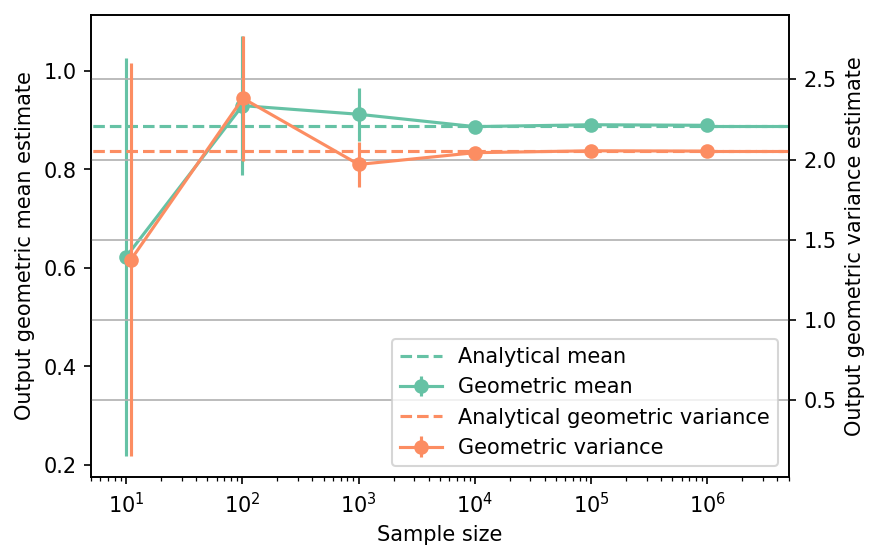

In [8]:
# --- Compute the MC estimates of geometric mean and variance
np.random.seed(42)
sample_sizes = np.array([1e1, 1e2, 1e3, 1e4, 1e5, 1e6], dtype=int)
geom_mean_estimates = np.empty((len(sample_sizes), 25))
geom_var_estimates = np.empty((len(sample_sizes), 25))

for i, sample_size in enumerate(sample_sizes):
    for j in range(25):
        xx_test = my_testfun.prob_input.get_sample(sample_size)
        yy_test = my_testfun(xx_test)
        geom_mean_estimates[i, j] = np.mean(np.log(-1 * yy_test))
        geom_var_estimates[i, j] = np.var(np.log(-1 * yy_test))

# Compute geometric mean and variance
geom_mean_estimates = np.exp(geom_mean_estimates)
geom_var_estimates = np.exp(geom_var_estimates)
geom_mean_estimates_errors = np.std(geom_mean_estimates, axis=1)
geom_var_estimates_errors = np.std(geom_var_estimates, axis=1)

# --- Plot the geometric mean and variance estimates
fig, ax_1 = plt.subplots(figsize=(6,4))

# Mean plot
ax_1.errorbar(
    sample_sizes,
    geom_mean_estimates[:,0],
    yerr=2*geom_mean_estimates_errors,
    marker="o",
    color="#66c2a5",
    label="Geometric mean"
)
# Plot the analytical mean
ax_1.plot(
    ext_sample_sizes,
    np.repeat(geom_mean_analytical, len(ext_sample_sizes)),
    linestyle="--",
    color="#66c2a5",
    label="Analytical mean",
)
ax_1.set_xlim([5, 5e6])
ax_1.set_xlabel("Sample size")
ax_1.set_ylabel("Output geometric mean estimate")
ax_1.set_xscale("log");
ax_2 = ax_1.twinx()

# Variance plot
ax_2.errorbar(
    sample_sizes+1,
    geom_var_estimates[:,0],
    yerr=2*geom_var_estimates_errors,
    marker="o",
    color="#fc8d62",
    label="Geometric variance",
)
# Plot the analytical variance
ax_2.plot(
    ext_sample_sizes,
    np.repeat(geom_var_analytical, len(ext_sample_sizes)),
    linestyle="--",
    color="#fc8d62",
    label="Analytical geometric variance",
)
ax_2.set_ylabel("Output geometric variance estimate")

# Add the two plots together to have a common legend
ln_1, labels_1 = ax_1.get_legend_handles_labels()
ln_2, labels_2 = ax_2.get_legend_handles_labels()
ax_2.legend(ln_1 + ln_2, labels_1 + labels_2, loc=4)

plt.grid()
fig.set_dpi(150)

The corresponding tabulated results for is shown below.

In [9]:
outputs = [
    [
        np.nan,
        geom_mean_analytical,
        0.0,
        geom_var_analytical,
        0.0,
        "Analytical",
    ]
]

for (
    sample_size,
    geom_mean_estimate,
    geom_mean_estimate_error,
    geom_var_estimate,
    geom_var_estimate_error,
) in zip(
    sample_sizes,
    geom_mean_estimates[:,0],
    2*geom_mean_estimates_errors,
    geom_var_estimates[:,0],
    2*geom_var_estimates_errors,
):
    outputs += [
        [
            sample_size,
            geom_mean_estimate,
            geom_mean_estimate_error,
            geom_var_estimate,
            geom_var_estimate_error,
            "Monte-Carlo",
        ],
    ]

header_names = [
    "Sample size",
    "Geom. mean",
    "Geom. mean error",
    "Geom. variance",
    "Geom. variance error",
    "Remark",
]

tabulate(
    outputs,
    numalign="center",
    stralign="center",
    tablefmt="html",
    floatfmt=(".1e", ".4e", ".4e", ".4f", ".4e", "s"),
    headers=header_names,
)

'<table>\n<thead>\n<tr><th style="text-align: center;"> Sample size </th><th style="text-align: center;"> Geom. mean </th><th style="text-align: center;"> Geom. mean error </th><th style="text-align: center;"> Geom. variance </th><th style="text-align: center;"> Geom. variance error </th><th style="text-align: center;">  Remark   </th></tr>\n</thead>\n<tbody>\n<tr><td style="text-align: center;">     nan     </td><td style="text-align: center;"> 8.8929e-01 </td><td style="text-align: center;">    0.0000e+00    </td><td style="text-align: center;">     2.0527     </td><td style="text-align: center;">      0.0000e+00      </td><td style="text-align: center;">Analytical </td></tr>\n<tr><td style="text-align: center;">   1.0e+01   </td><td style="text-align: center;"> 6.2267e-01 </td><td style="text-align: center;">    4.0444e-01    </td><td style="text-align: center;">     1.3758     </td><td style="text-align: center;">      1.2230e+00      </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+02   </td><td style="text-align: center;"> 9.2969e-01 </td><td style="text-align: center;">    1.4166e-01    </td><td style="text-align: center;">     2.3817     </td><td style="text-align: center;">      3.8906e-01      </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+03   </td><td style="text-align: center;"> 9.1214e-01 </td><td style="text-align: center;">    5.3468e-02    </td><td style="text-align: center;">     1.9694     </td><td style="text-align: center;">      1.3818e-01      </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+04   </td><td style="text-align: center;"> 8.8705e-01 </td><td style="text-align: center;">    1.0673e-02    </td><td style="text-align: center;">     2.0427     </td><td style="text-align: center;">      3.3825e-02      </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+05   </td><td style="text-align: center;"> 8.9089e-01 </td><td style="text-align: center;">    3.9008e-03    </td><td style="text-align: center;">     2.0544     </td><td style="text-align: center;">      1.4670e-02      </td><td style="text-align: center;">Monte-Carlo</td></tr>\n<tr><td style="text-align: center;">   1.0e+06   </td><td style="text-align: center;"> 8.8972e-01 </td><td style="text-align: center;">    1.7226e-03    </td><td style="text-align: center;">     2.0526     </td><td style="text-align: center;">      3.9520e-03      </td><td style="text-align: center;">Monte-Carlo</td></tr>\n</tbody>\n</table>'

## References

```{bibliography}
:style: unsrtalpha
:filter: docname in docnames
```